In [34]:
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.filterwarnings("ignore")

## Loading the cleaned data

In [35]:
bank_additional_cleaned = pd.read_csv('bank_additional_cleaned.csv')
bank_additional_cleaned.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,PC1
0,56.0,housemaid,married,basic.4y,no,no,telephone,may,mon,261.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
1,57.0,services,married,high.school,no,no,telephone,may,mon,149.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
2,37.0,services,married,high.school,yes,no,telephone,may,mon,226.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
3,40.0,admin.,married,basic.6y,no,no,telephone,may,mon,151.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079
4,56.0,services,married,high.school,no,yes,telephone,may,mon,307.0,1.0,0.0,nonexistent,93.994,-36.4,0.0,-1.015079


In [36]:
bank_additional_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37091 entries, 0 to 37090
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37091 non-null  float64
 1   job             37091 non-null  object 
 2   marital         37091 non-null  object 
 3   education       37091 non-null  object 
 4   housing         37091 non-null  object 
 5   loan            37091 non-null  object 
 6   contact         37091 non-null  object 
 7   month           37091 non-null  object 
 8   day_of_week     37091 non-null  object 
 9   duration        37091 non-null  float64
 10  campaign        37091 non-null  float64
 11  previous        37091 non-null  float64
 12  poutcome        37091 non-null  object 
 13  cons.price.idx  37091 non-null  float64
 14  cons.conf.idx   37091 non-null  float64
 15  y               37091 non-null  float64
 16  PC1             33551 non-null  float64
dtypes: float64(8), object(9)
memory

### Stastical Analysis

In [37]:
bank_additional_cleaned.describe()

,age,duration,campaign,previous,cons.price.idx,cons.conf.idx,y,PC1
count,37091.000000,37091.000000,37091.000000,37091.000000,37091.00000,37091.000000,37091.000000,33551.000000
mean,39.976598,218.028713,2.120568,0.180367,93.56047,-40.497487,0.092961,0.044708
std,10.444553,157.078688,1.416336,0.504639,0.58065,4.677442,0.290381,1.708397
min,17.000000,0.000000,1.000000,0.000000,92.20100,-50.800000,0.000000,-1.453686
25%,32.000000,103.000000,1.000000,0.000000,93.07500,-42.700000,0.000000,-1.450672
50%,38.000000,174.000000,2.000000,0.000000,93.44400,-41.800000,0.000000,-1.015079
75%,47.000000,293.000000,3.000000,0.000000,93.99400,-36.400000,0.000000,1.946853
max,98.000000,752.000000,7.000000,7.000000,94.76700,-26.900000,1.000000,3.376641


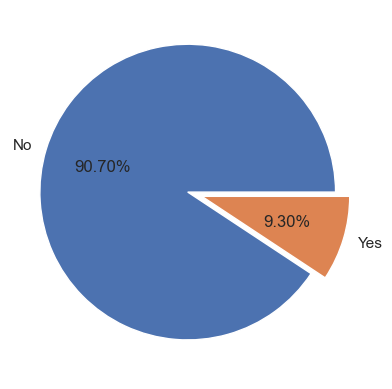

In [38]:
plt.pie(bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts(),labels = bank_additional_cleaned['y'].map({0:'No',1:'Yes'}).value_counts().index.tolist(), autopct='%1.2f%%',explode=[0.05]*2)
plt.show()

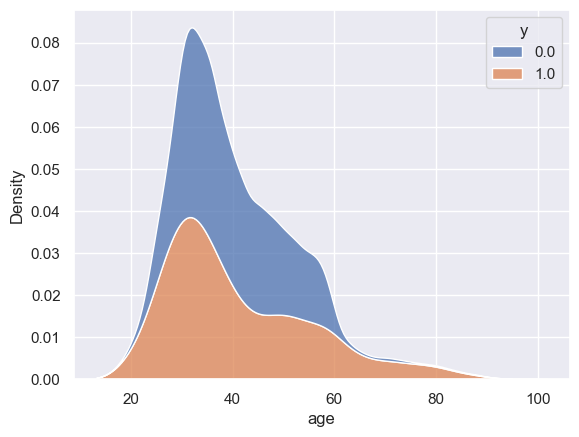

In [39]:
sns.kdeplot(data=bank_additional_cleaned, x="age", hue="y", multiple="stack", common_norm=False)
plt.show()

In [40]:
bin_edges = [17, 25, 40,60, float('inf')]
bin_labels = ['17-25', '26-40', '41-60', '60+']

bank_additional_cleaned['age_group'] = pd.cut(bank_additional_cleaned['age'], bins=bin_edges, labels=bin_labels, include_lowest = True)

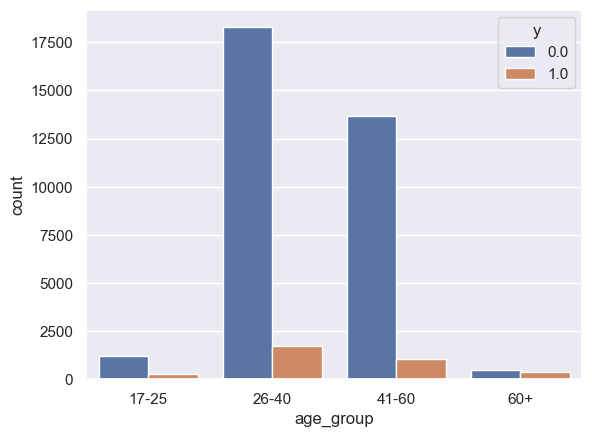

In [41]:
sns.countplot(x='age_group',data=bank_additional_cleaned,hue='y')
plt.show()

In [42]:
bank_additional_cleaned[['age_group', 'y']].groupby(['age_group']).mean().sort_values('y',ascending=False)

,y
age_group,
60+,0.449173
17-25,0.196939
26-40,0.086872
41-60,0.070158


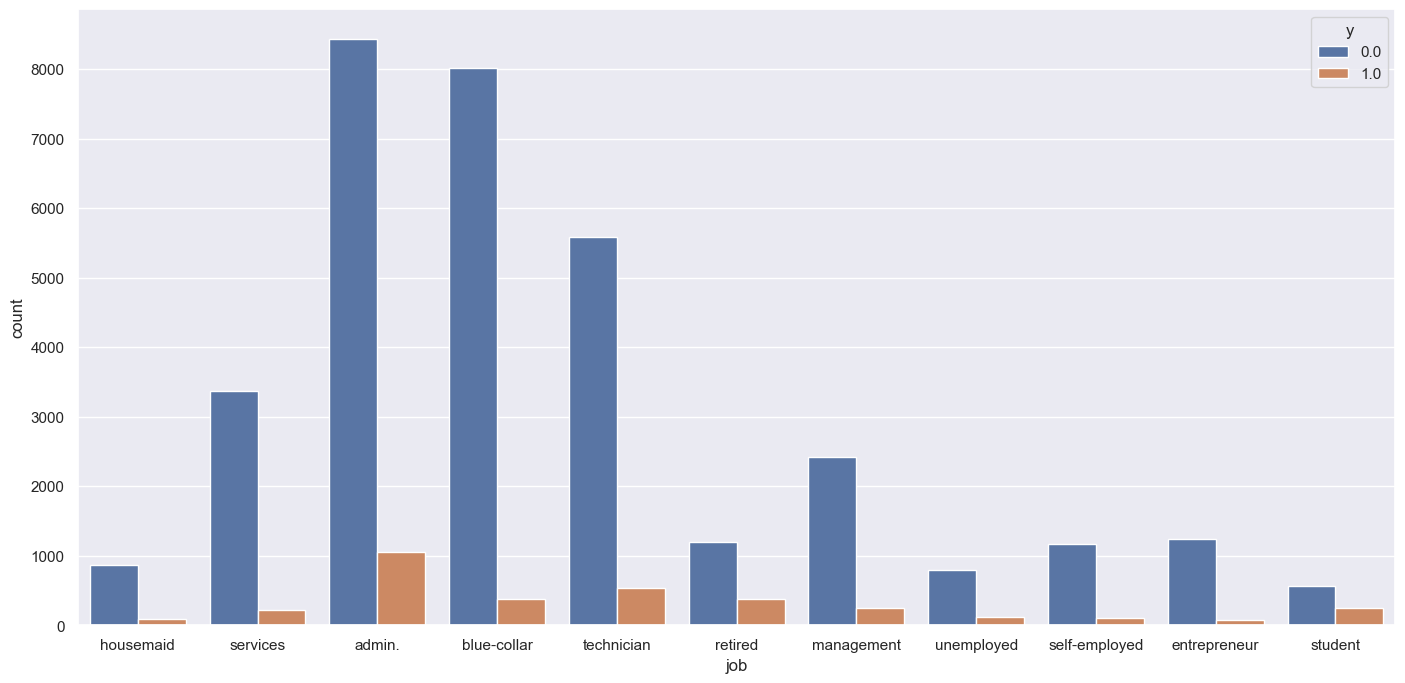

In [43]:
plt.figure(figsize=(17,8))
sns.countplot(x='job',data=bank_additional_cleaned,hue='y')
plt.show()

In [44]:
bank_additional_cleaned[['job', 'y']].groupby(['job']).mean().sort_values('y',ascending=False)

,y
job,
student,0.304938
retired,0.240918
unemployed,0.133772
admin.,0.111146
management,0.092204
housemaid,0.090622
technician,0.088043
self-employed,0.080911
services,0.061020


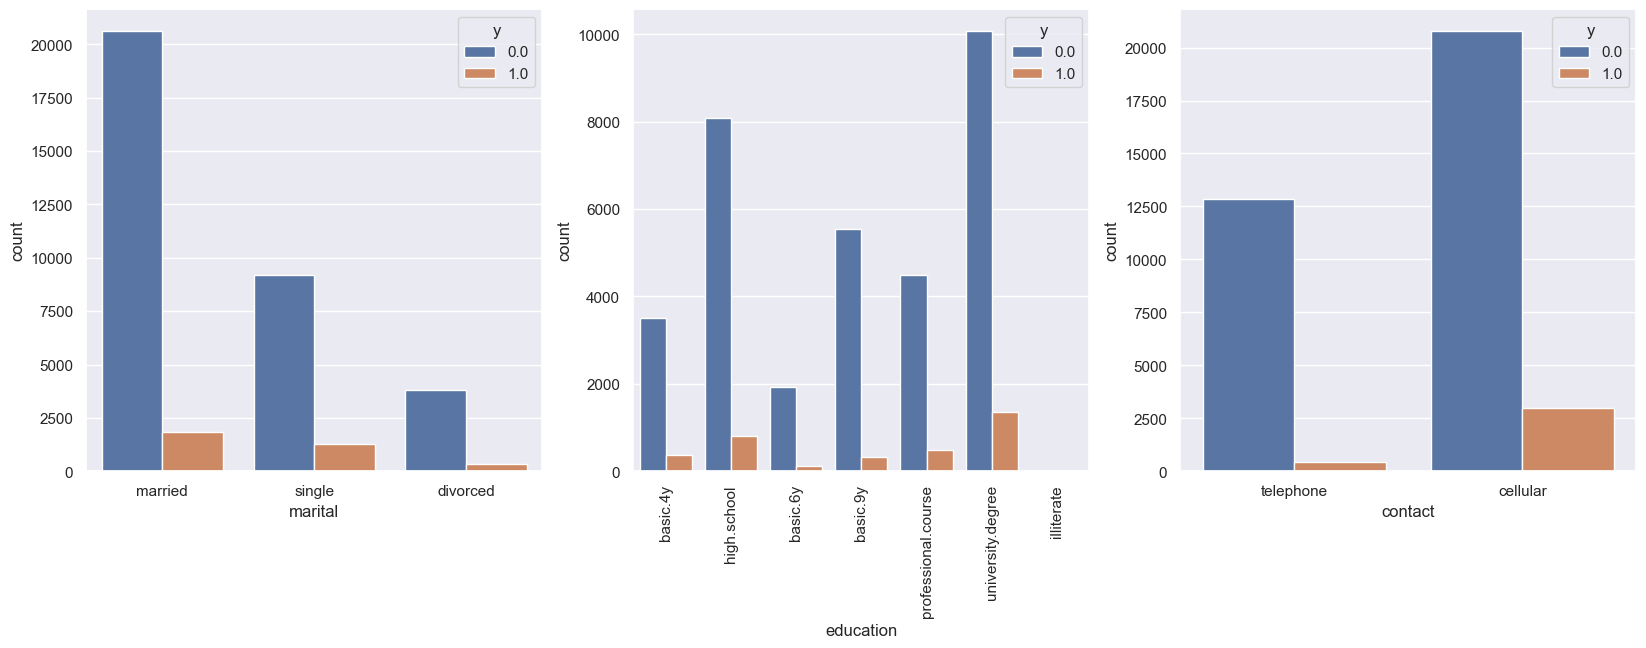

In [45]:
fig, ax = plt.subplots(1,3, figsize = (20,6))
sns.countplot(x='marital',data=bank_additional_cleaned,hue='y',ax=ax[0])
sns.countplot(x='education',data=bank_additional_cleaned,hue='y',ax=ax[1])
ax[1].tick_params(axis='x', rotation=90)
sns.countplot(x='contact',data=bank_additional_cleaned,hue='y',ax=ax[2])
plt.show()

In [46]:
bank_additional_cleaned[['education', 'y']].groupby(['education']).mean().sort_values('y',ascending=False)

,y
education,
illiterate,0.187500
university.degree,0.119360
professional.course,0.095824
basic.4y,0.093750
high.school,0.091379
basic.6y,0.054385
basic.9y,0.054155


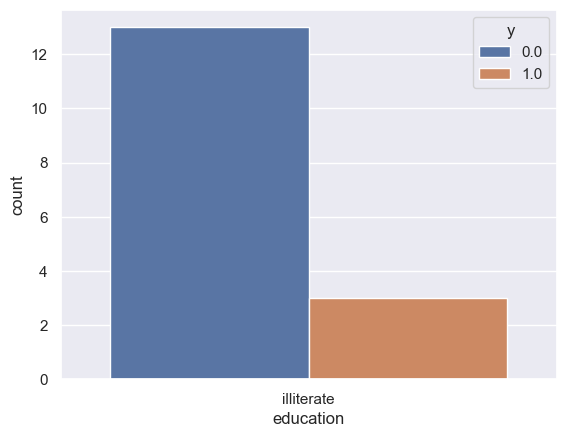

In [47]:
sns.countplot(x='education',data=bank_additional_cleaned[bank_additional_cleaned.education == 'illiterate'],hue='y')
plt.show()

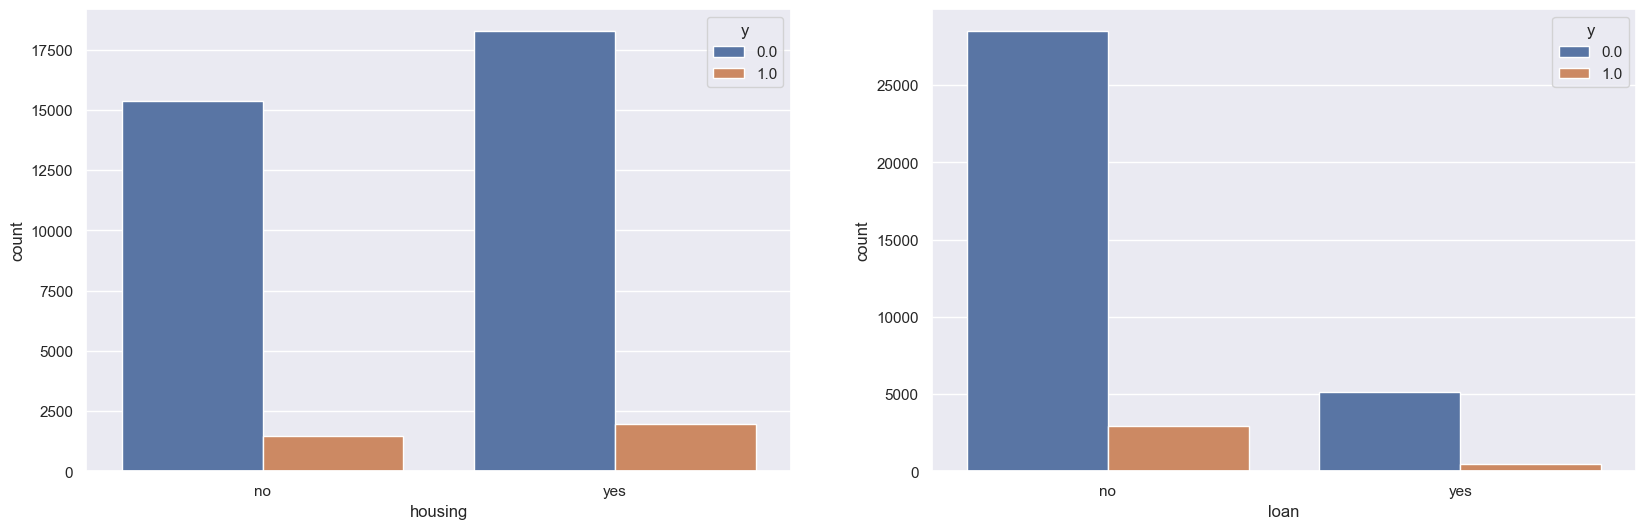

In [48]:
fig, ax = plt.subplots(1,2, figsize = (20,6))
sns.countplot(x='housing',data=bank_additional_cleaned,hue='y',ax=ax[0])
sns.countplot(x='loan',data=bank_additional_cleaned,hue='y',ax=ax[1])
plt.show()

In [49]:
bin_edges = [0, 120, 300, 600, float('inf')]
bin_labels = ['short', 'medium', 'long', 'very long']

bank_additional_cleaned['duration_group'] = pd.cut(bank_additional_cleaned['duration'], bins=bin_edges, labels=bin_labels, include_lowest = True)

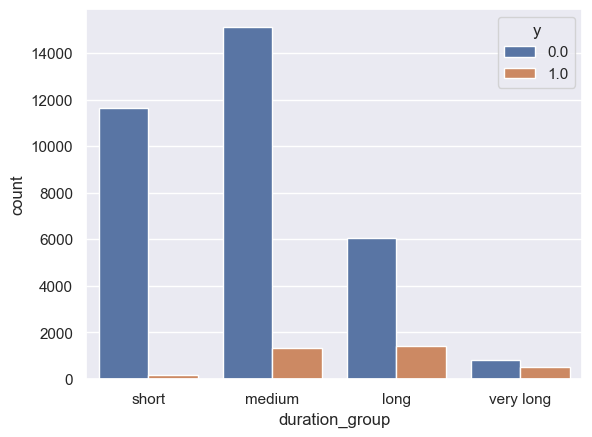

In [50]:
sns.countplot(x='duration_group',data=bank_additional_cleaned,hue='y')
plt.show()

In [51]:
bank_additional_cleaned[['duration_group', 'y']].groupby(['duration_group']).mean().sort_values('y',ascending=False)

,y
duration_group,
very long,0.396296
long,0.188835
medium,0.081035
short,0.013994


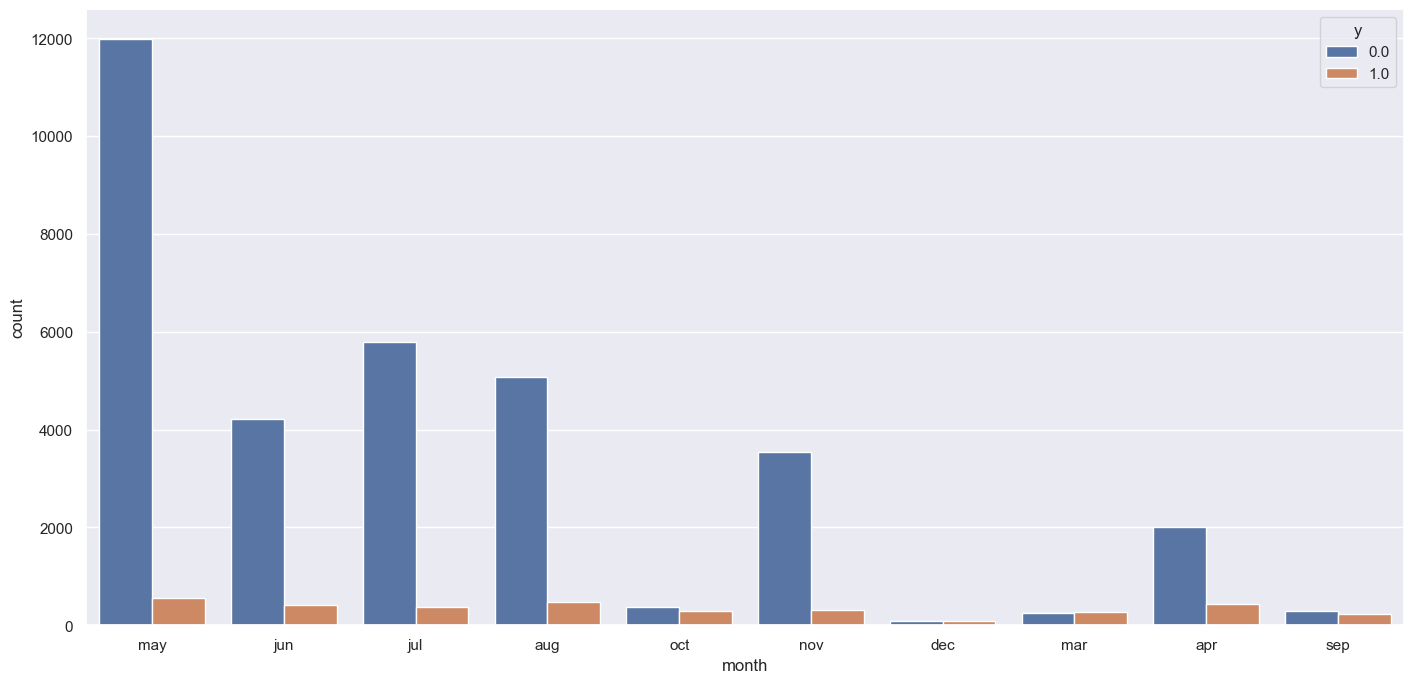

In [52]:
plt.figure(figsize=(17,8))
sns.countplot(x='month',data=bank_additional_cleaned,hue='y')
plt.show()

During the months of January and February, there were no significant calls reported. However, the highest number of calls were recorded in May, which is likely attributed to the beginning of a new financial year and the customary annual increments for employees.

In [53]:
bank_additional_cleaned[['month', 'y']].groupby(['month']).mean().sort_values('y',ascending=False)

,y
month,
mar,0.502890
dec,0.481928
sep,0.435361
oct,0.431751
apr,0.180999
jun,0.090517
aug,0.087340
nov,0.081130
jul,0.061578


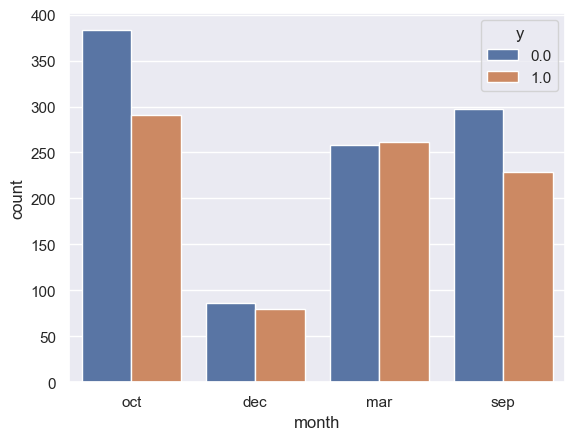

In [54]:
sns.countplot(x='month',data=bank_additional_cleaned[bank_additional_cleaned.month.isin(['mar','dec','sep','oct'])],hue='y')
plt.show()

March had the most conversions for the bank's term deposit product despite only around 500 calls. The success may have been influenced by factors like interest rates, promotions, and sales representatives.

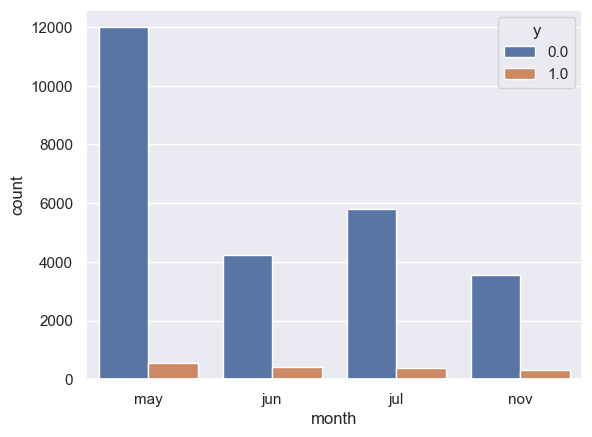

In [55]:
sns.countplot(x='month',data=bank_additional_cleaned[bank_additional_cleaned.month.isin(['may','jun','jul','nov'])],hue='y')
plt.show()

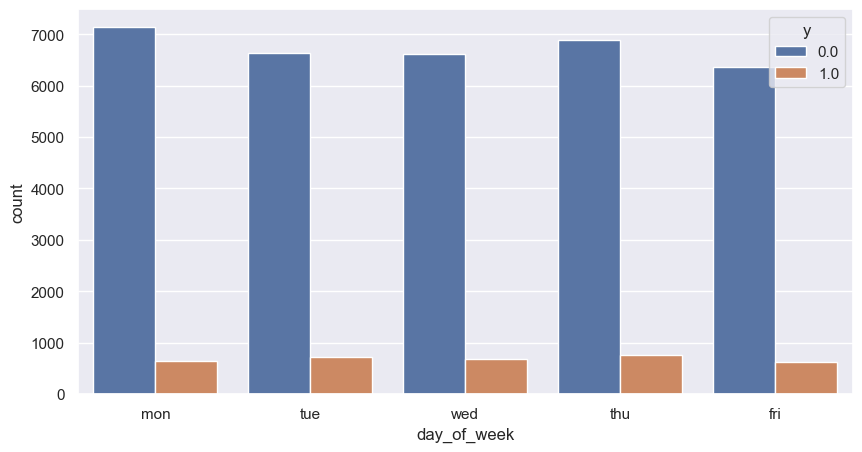

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(x='day_of_week',data=bank_additional_cleaned,hue='y')
plt.show()

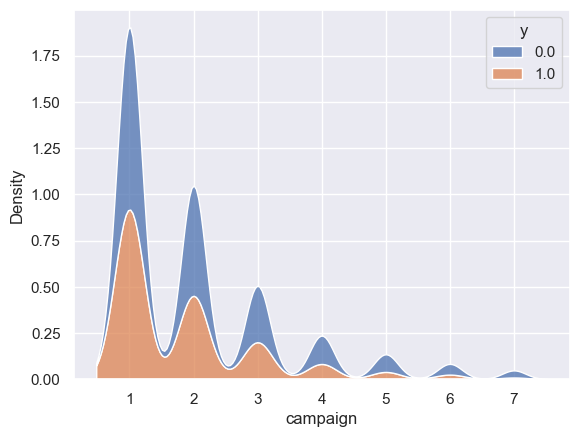

In [57]:
sns.kdeplot(data=bank_additional_cleaned, x="campaign", hue="y", multiple="stack", common_norm=False)
plt.show()

In [58]:
bank_additional_cleaned[['campaign', 'y']].groupby(['campaign']).mean().sort_values('y',ascending=False)

,y
campaign,
1.0,0.109801
2.0,0.091194
3.0,0.080096
4.0,0.066613
6.0,0.054113
5.0,0.052076
7.0,0.031879


In [59]:
bank_additional_cleaned.describe()['previous']

count    37091.000000
mean         0.180367
std          0.504639
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [60]:
bank_additional_cleaned[['previous', 'y']].groupby(['previous']).mean().sort_values('y',ascending=False)

,y
previous,
5.0,0.722222
6.0,0.600000
3.0,0.580000
4.0,0.544118
2.0,0.444763
1.0,0.195020
0.0,0.067002
7.0,0.000000


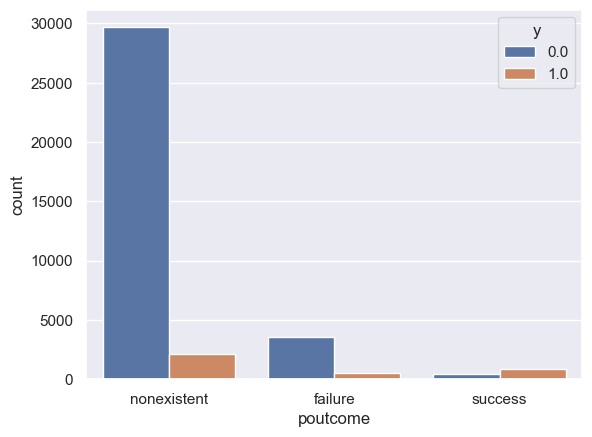

In [61]:
sns.countplot(x='poutcome',data=bank_additional_cleaned,hue='y')
plt.show()

In [62]:
bank_additional_cleaned[['poutcome', 'y']].groupby(['poutcome']).mean().sort_values('y',ascending=False)

,y
poutcome,
success,0.643975
failure,0.123253
nonexistent,0.067002


In [63]:
from sklearn.preprocessing import LabelEncoder
cat_cols = list(bank_additional_cleaned.select_dtypes(include=['object','category']).columns)
le = LabelEncoder()
for col in cat_cols:
    bank_additional_cleaned[col] = le.fit_transform(bank_additional_cleaned[col].astype(str))

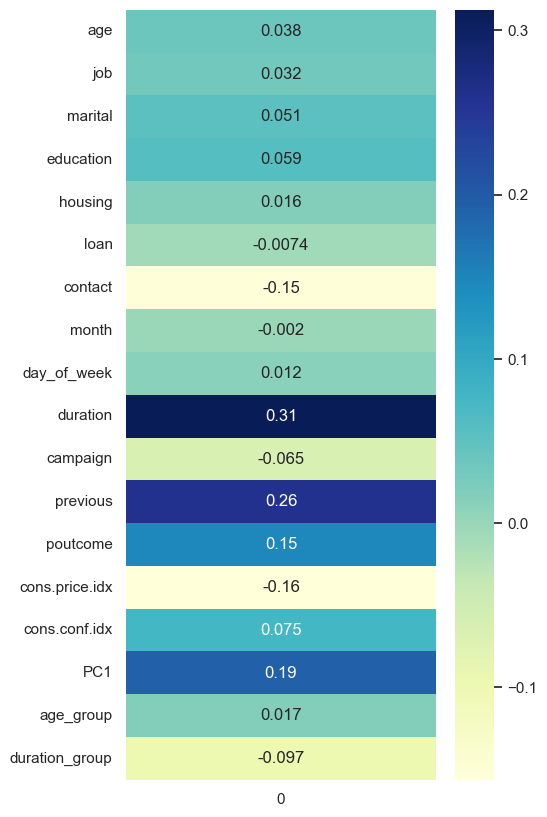

In [64]:
correlation =  bank_additional_cleaned.drop('y',axis=1).corrwith(bank_additional_cleaned.y)
fig, ax = plt.subplots(figsize=(5,10))      
sns.heatmap(pd.DataFrame(correlation),annot = True,cmap="YlGnBu")
plt.show()

In [65]:
## Drop age group and duration group they are useful for EDA but model might be less accurate